In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import math

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [5]:
new_york = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/ts_new_york_2016-01-20.csv',
                   encoding='utf8')

In [6]:
new_york.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36003 entries, 0 to 36002
Data columns (total 16 columns):
Unnamed: 0              36003 non-null int64
room_id                 36003 non-null int64
host_id                 35988 non-null float64
room_type               35988 non-null object
borough                 36003 non-null object
neighborhood            36003 non-null object
reviews                 36003 non-null int64
overall_satisfaction    26877 non-null float64
accommodates            33055 non-null float64
bedrooms                35889 non-null float64
bathrooms               33721 non-null float64
price                   36003 non-null float64
minstay                 35578 non-null float64
latitude                36003 non-null float64
longitude               36003 non-null float64
collected               36003 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 4.4+ MB


In [7]:
new_york = new_york[new_york['host_id'].notnull()]

In [40]:
len(new_york.neighborhood.unique())

222

In [10]:
new_york.head(2)

Unnamed: 0  room_id  host_id     room_type    borough    neighborhood  \
0           0      105    500.0  Private room  Manhattan  Hell's Kitchen   
1           1     2515   2758.0  Private room  Manhattan          Harlem   

   reviews  overall_satisfaction  accommodates  bedrooms  bathrooms  price  \
0       39                   5.0           NaN       1.0        1.0  549.0   
1      125                   4.5           2.0       1.0        2.0   59.0   

   minstay   latitude  longitude                   collected  
0      1.0  40.762099 -73.996022  2016-01-22 01:32:16.039626  
1      2.0  40.799205 -73.953676  2016-01-21 16:14:58.025230

In [41]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(new_york.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))


In [42]:
df1 = df1.reset_index(level = 0)
df1.sort('host_id', ascending=False, inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [43]:
df1.sort_values('neighborhood',inplace=True)

In [44]:
df1 = df1.reset_index()

In [45]:
df1.head(2)

index   neighborhood  reviews  host_id      price
0      0       Allerton      455       19  60.736842
1      1  Arden Heights       23        4  47.250000

In [46]:
def standardize(S):
    scaler = preprocessing.StandardScaler().fit(S)
    return scaler.transform(S)

In [47]:
df1.host_id = standardize(df1.host_id)
df1.reviews = standardize(df1.reviews)
df1.price = standardize(df1.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either usin

In [50]:
#df1.plot(x = 'neighborhood', y = ['host_id','reviews','price'], kind ='barh', figsize =(8, 12))

In [51]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(new_york.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [52]:
df2.reset_index(level=0, inplace=True)
df2.reset_index(inplace=True)

In [53]:
df2.host_id = standardize(df2.host_id)
df2.reviews = standardize(df2.reviews)
df2.price = standardize(df2.price)
df2.head()

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either usin

room_type   neighborhood   reviews   host_id     price
0  Entire home/apt       Allerton -0.273823 -0.336182 -0.133064
1     Private room       Allerton -0.222794 -0.294902 -0.512298
2      Shared room       Allerton -0.335676 -0.356822 -0.616948
3  Entire home/apt  Arden Heights -0.336062 -0.356822 -0.114512
4     Private room  Arden Heights -0.327171 -0.346502 -0.658173

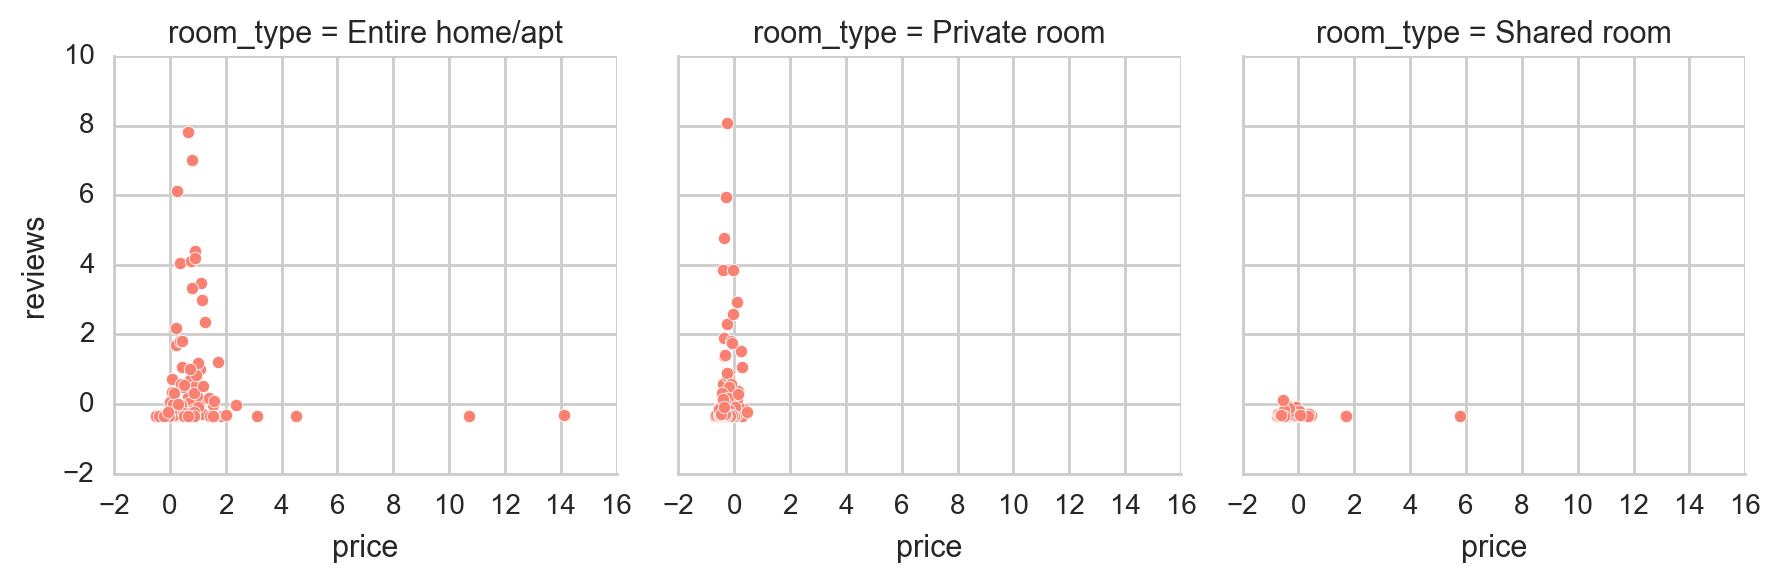

In [54]:
g = sns.FacetGrid(df2, col="room_type")
g = g.map(plt.scatter,"price","reviews", edgecolor="w", color = "salmon")

In [55]:
custom = lambda x: np.average(x)
neighborhood_data = pd.DataFrame(new_york.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom, 'latitude':custom,'longitude':custom}))

In [56]:
neighborhood_data.reset_index(inplace =True)

In [97]:
neighborhood_data.shape

(222, 6)

In [58]:
# define price

def price_color(neighborhood_data, row):
    
    price_max = np.max(neighborhood_data.price)
    price_min = np.min(neighborhood_data.price)
    
    
    if price_min <= neighborhood_data.ix[row, 'price'] < price_min + ((price_max - price_min)/3):
        return 'green'
    elif price_min + ((price_max - price_min)/3) <= neighborhood_data.ix[row, 'price'] < (price_min + 2*(price_max - price_min)/3):
        return 'orange'
    else:
        return 'red'

In [59]:
import folium

In [61]:
newyork_map = folium.Map(location=[40.730610, -73.935242])

for each_row in range(neighborhood_data.shape[0]):
     newyork_map.simple_marker(location = [neighborhood_data.ix[each_row,'latitude'],neighborhood_data.ix[each_row,'longitude']],
                            popup = str(neighborhood_data.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [62]:
newyork_map

In [63]:
import json


In [64]:
with open('/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/06463a12c2104adf86335df0170c25e3pediacitiesnycneighborhoods.geojson') as fp:

     geodata = json.load(fp)

In [75]:
#geodata['features'][2]['properties']

In [133]:
neighborhood_coords = {}

for i in range(len(geodata['features'])):
    neighborhood_coords[geodata['features'][i]['properties']['neighborhood']] = geodata['features'][i]['geometry']['coordinates']

In [134]:
neighborhood_coords = pd.DataFrame(neighborhood_coords.items(), columns = ['neighborhood', 'long_lat'])

In [135]:
neighborhood_coords.sort_values('neighborhood',inplace=True)

In [136]:
neighborhood_coords = neighborhood_coords.reset_index()
neighborhood_coords.drop('index', axis=1)

neighborhood  \
0                      Allerton   
1               Alley Pond Park   
2                 Arden Heights   
3                     Arlington   
4                      Arrochar   
5                       Arverne   
6                       Astoria   
7                    Bath Beach   
8             Battery Park City   
9                     Bay Ridge   
10                  Bay Terrace   
11   Bay Terrace, Staten Island   
12                   Baychester   
13                      Bayside   
14                    Bayswater   
15           Bedford-Stuyvesant   
16                 Belle Harbor   
17                    Bellerose   
18                      Belmont   
19                  Bensonhurst   
20                 Bergen Beach   
21                   Bloomfield   
22                  Boerum Hill   
23                 Borough Park   
24                 Breezy Point   
25                    Briarwood   
26               Brighton Beach   
27                Broad Channel   
28                   Bronx Park   
29                    Bronxdale   
..                          ...   
236                 Throgs Neck   
237                   Todt Hill   
238               Tompkinsville   
239                 Tottenville   
240                     Tremont   
241                     Tribeca   
242                 Two Bridges   
243                   Unionport   
244          University Heights   
245             Upper East Side   
246             Upper West Side   
247          Van Cortlandt Park   
248                    Van Nest   
249                Vinegar Hill   
250                   Wakefield   
251          Washington Heights   
252               West Brighton   
253                  West Farms   
254                West Village   
255          Westchester Square   
256                 Westerleigh   
257                  Whitestone   
258              Williamsbridge   
259                Williamsburg   
260                 Willowbrook   
261             Windsor Terrace   
262                   Woodhaven   
263                    Woodlawn   
264                     Woodrow   
265                    Woodside   

                                              long_lat  
0    [[[-73.848597, 40.87167], [-73.8458225368, 40....  
1    [[[-73.743332682, 40.7388830993], [-73.7437139...  
2    [[[-74.169827, 40.561078], [-74.1698225726, 40...  
3    [[[-74.1597481587, 40.6414165258], [-74.159978...  
4    [[[-74.0607798935, 40.5931880047], [-74.060791...  
5    [[[-73.7895346213, 40.5999718149], [-73.789541...  
6    [[[-73.9016030506, 40.7677702972], [-73.902696...  
7    [[[-73.99381, 40.60195], [-73.9996196272, 40.5...  
8    [[[-74.013754, 40.71369], [-74.014262, 40.7109...  
9    [[[-74.0147520435, 40.6339671609], [-74.014752...  
10   [[[-73.7706523268, 40.7820781554], [-73.775599...  
11   [[[-74.1326135331, 40.5634533624], [-74.13311,...  
12   [[[-73.831107913, 40.8655471767], [-73.8292965...  
13   [[[-73.7456631441, 40.7515780165], [-73.744102...  
14   [[[-73.7667082778, 40.6149108662], [-73.768252...  
15   [[[-73.9411488596, 40.7002811533], [-73.905479...  
16   [[[-73.8473190671, 40.5819571025], [-73.842983...  
17   [[[-73.7176158606, 40.7440328454], [-73.714821...  
18   [[[-73.8806747508, 40.8571598617], [-73.880743...  
19   [[[-73.9729976784, 40.6088332033], [-73.972988...  
20   [[[-73.9173199895, 40.6310071527], [-73.903961...  
21   [[[-74.16848, 40.621562], [-74.16922, 40.62130...  
22   [[[-73.9799034496, 40.6874664499], [-73.978026...  
23   [[[-73.9889670118, 40.6441224895], [-73.978531...  
24   [[[-73.8626592768, 40.5668002967], [-73.862868...  
25   [[[-73.807669, 40.715506], [-73.807422, 40.714...  
26   [[[-73.96661, 40.584575], [-73.96521, 40.58378...  
27   [[[-73.8233759213, 40.6389876559], [-73.822771...  
28   [[[-73.8699477217, 40.8558855414], [-73.868609...  
29   [[[-73.8688818092, 40.8572231502], [-73.856388...  
..                                                 ...  
236  [[[-73.826236486, 4

In [137]:
neighborhood_coords['longitude'] = 0
neighborhood_coords['latitude'] = 0

In [138]:
import shapely
from shapely.geometry import Polygon, Point

#center = {}

for i in range(neighborhood_coords.shape[0]):
    poly = Polygon(neighborhood_coords.long_lat[i][0])
    neighborhood_coords.longitude[i] = poly.centroid.wkt.split()[1].split('(')[1]
    neighborhood_coords.latitude[i] = poly.centroid.wkt.split()[2].split(')')[0]



/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [139]:
neighborhood_coords['longitude'] = neighborhood_coords['longitude'].map(lambda x : float(x))
neighborhood_coords['latitude'] = neighborhood_coords['latitude'].map(lambda x : float(x))

In [142]:
neighborhood_coords.head(2)

index     neighborhood                                           long_lat  \
0     17         Allerton  [[[-73.848597, 40.87167], [-73.8458225368, 40....   
1    109  Alley Pond Park  [[[-73.743332682, 40.7388830993], [-73.7437139...   

   longitude   latitude  
0 -73.859984  40.864727  
1 -73.744513  40.750262

In [148]:
c = neighborhood_coords['neighborhood'].isin(neighborhood_data['neighborhood'])
neighborhood_coords = neighborhood_coords[c].reset_index()

In [150]:
neighborhood_coords.head(2)

level_0  index   neighborhood  \
0        0     17       Allerton   
1        2     93  Arden Heights   

                                            long_lat  longitude   latitude  
0  [[[-73.848597, 40.87167], [-73.8458225368, 40.... -73.859984  40.864727  
1  [[[-74.169827, 40.561078], [-74.1698225726, 40... -74.179460  40.554810

In [151]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/06463a12c2104adf86335df0170c25e3pediacitiesnycneighborhoods.geojson'


nbrhd_map = folium.Map(location=[40.730610, -73.935242],
                    zoom_start=12)
nbrhd_map.choropleth(geo_path=path, fill_opacity=0.2,
                     fill_color = 'YlGnBu',line_opacity=0.8, line_weight=2)

In [152]:
for each_row in range(neighborhood_coords.shape[0]):
     nbrhd_map.simple_marker(location = [neighborhood_coords.ix[each_row,'latitude'],neighborhood_coords.ix[each_row,'longitude']],
                             popup = str(neighborhood_coords.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                             marker_color = price_color(neighborhood_data,each_row)
                              )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [153]:
  nbrhd_map

In [156]:
import json

In [163]:
newyork_metro = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/DOITT_SUBWAY_STATION_01_13SEPT2010.csv'
                         )

In [164]:
newyork_metro.head(2)

URL  OBJECTID      NAME  \
0  http://web.mta.info/nyct/service/         1  Astor Pl   
1  http://web.mta.info/nyct/service/         2  Canal St   

                                       the_geom           LINE  \
0  POINT (-73.99106999861966 40.73005400028978)  4-6-6 Express   
1  POINT (-74.00019299927328 40.71880300107709)  4-6-6 Express   

                                               NOTES  
0  4 nights, 6-all times, 6 Express-weekdays AM s...  
1  4 nights, 6-all times, 6 Express-weekdays AM s...

In [174]:
newyork_metro = newyork_metro[['NAME','the_geom']]
newyork_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 2 columns):
NAME        473 non-null object
the_geom    473 non-null object
dtypes: object(2)
memory usage: 7.5+ KB


In [188]:
newyork_metro['longitude'] = 0
newyork_metro['latitude'] = 0

In [189]:
newyork_metro.the_geom[0].split()[1].split('(')[1]

'-73.99106999861966'

In [192]:
for i in range(newyork_metro.shape[0]):
    
    newyork_metro.ix[i, 'longitude'] = newyork_metro.the_geom[i].split()[1].split('(')[1]
    newyork_metro.ix[i, 'latitude'] = newyork_metro.the_geom[i].split()[2].split(')')[0]



In [193]:
newyork_metro.head(2)

NAME                                      the_geom           longitude  \
0  Astor Pl  POINT (-73.99106999861966 40.73005400028978)  -73.99106999861966   
1  Canal St  POINT (-74.00019299927328 40.71880300107709)  -74.00019299927328   

            latitude  
0  40.73005400028978  
1  40.71880300107709

In [194]:
newyork_metro['longitude'] = newyork_metro['longitude'].map(lambda x : float(x))
newyork_metro['latitude'] = newyork_metro['latitude'].map(lambda x : float(x))

In [196]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/06463a12c2104adf86335df0170c25e3pediacitiesnycneighborhoods.geojson'


metro_map = folium.Map(location=[40.730610, -73.935242],
                    zoom_start=12)
metro_map.choropleth(geo_path=path, fill_opacity=0.2,
                     fill_color = 'YlGnBu',line_opacity=0.8, line_weight=2)

In [197]:
for each_row in range(newyork_metro.shape[0]):
     metro_map.circle_marker(location = [newyork_metro.ix[each_row,'latitude'],newyork_metro.ix[each_row,'longitude']],
                         radius = 30,fill_color = 'blue',line_color = 'blue',fill_opacity = 0.8
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [198]:
metro_map

In [199]:
import shapely
from shapely.geometry import Polygon, Point

In [202]:
def dot_count(polygon_coords, dot_coords):
    count_dict = {}

    for row in range(polygon_coords.shape[0]):
        poly = Polygon(polygon_coords.ix[row,u'long_lat'][0])
        count = 0
        for i in range(dot_coords.shape[0]):
            point = Point(dot_coords.ix[i,'longitude'],dot_coords.ix[i,'latitude'])
            #print point
        
            if poly.contains(point):
                count = count + 1
        #print count
        nbrhd_name = polygon_coords.ix[row,'neighborhood']
        count_dict[nbrhd_name] = count
    
    return count_dict


In [203]:
metrostn_count = dot_count(neighborhood_coords, newyork_metro)

In [204]:
metrostn_count = pd.DataFrame(metrostn_count.items(),columns=['neighborhood','stn_count'])

In [205]:
metrostn_count.sort_values('neighborhood',inplace=True)

In [206]:
metrostn_count = metrostn_count.reset_index()

In [207]:
metrostn_count

index                neighborhood  stn_count
0       14                    Allerton          2
1       81               Arden Heights          0
2      119                    Arrochar          0
3      138                     Arverne          2
4       24                     Astoria          4
5      114           Battery Park City          0
6       42                   Bay Ridge          2
7       13                 Bay Terrace          0
8      164  Bay Terrace, Staten Island          0
9       60                  Baychester          0
10      59                     Bayside          0
11      91                   Bayswater          0
12     193          Bedford-Stuyvesant         11
13     192                Belle Harbor          0
14     190                   Bellerose          0
15      64                     Belmont          0
16      21                 Bensonhurst          5
17     101                Bergen Beach          0
18      99                 Boerum Hill          2
19     116                Borough Park         10
20      93                   Briarwood          0
21     110              Brighton Beach          5
22     120                  Bronx Park          0
23      74                   Bronxdale          1
24      48            Brooklyn Heights          2
25     105                 Brownsville          7
26     107                    Bushwick         12
27      39             Cambria Heights          0
28     155                    Canarsie          2
29     143             Carroll Gardens          1
..     ...                         ...        ...
192    160            Theater District          8
193    102                 Throgs Neck          0
194     25                   Todt Hill          0
195    133               Tompkinsville          0
196    130                 Tottenville          0
197    170                     Tremont          0
198     80                     Tribeca          6
199     44                 Two Bridges          0
200     72                   Unionport          1
201     28          University Heights          0
202     62             Upper East Side         10
203     40             Upper West Side          7
204    213          Van Cortlandt Park          0
205    173                    Van Nest          2
206    154                Vinegar Hill          0
207     31                   Wakefield          4
208    187          Washington Heights         11
209    104               West Brighton          0
210     15                  West Farms          1
211     36                West Village          5
212     32          Westchester Square          3
213     82                 Westerleigh          0
214    103                  Whitestone          0
215     66              Williamsbridge          2
216     73                Williamsburg         12
217    150             Windsor Terrace          2
218    212                   Woodhaven          3
219     65                    Woodlawn          0
220     84                     Woodrow          0
221    203                    Woodside          4

[222 rows x 3 columns]

In [208]:
import xmltodict